1.- CARGA DE DATOS Y ANALISIS EXPLORATORIO DE DATOS (EDA)


In [28]:
# Importamos las librerias necesarias#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Carga de datos
df = pd.read_csv('ML_cars.csv')

In [41]:
# Visualización de las primeras filas del DataFrame
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [31]:
# Verificar si hay datos nulos en el DataFrame
nulos = df.isnull()

# Contar la cantidad de valores nulos en cada columna
cantidad_nulos = nulos.sum()

# Mostrar las columnas con valores nulos y la cantidad de nulos en cada una
print("Columnas con valores nulos:")
print(cantidad_nulos[cantidad_nulos > 0])


Columnas con valores nulos:
Series([], dtype: int64)


In [ ]:
# Información general del DataFrame
print(df.info())

In [ ]:
# Estadísticas descriptivas
print(df.describe())

Matriz de Correlacion entre 4 variables

In [14]:
correlation_matrix = df[['price', 'horsepower', 'curbweight', 'enginesize']].corr()


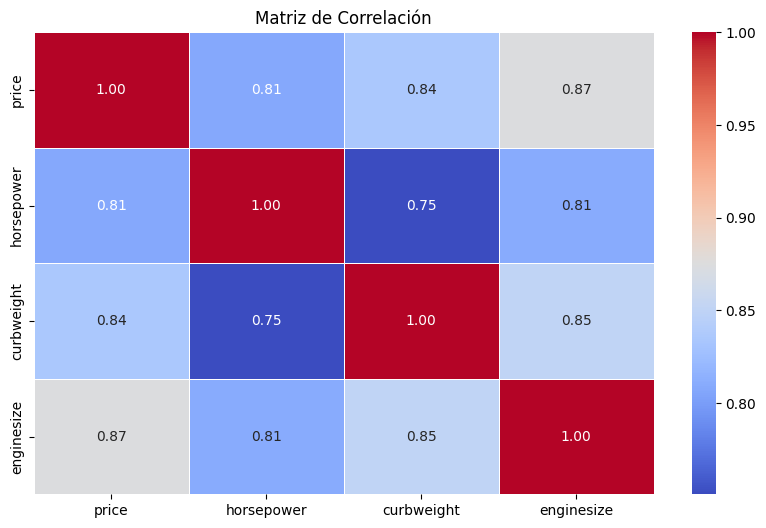

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


Diagramas de Barras : Relacion entre Precio y Modelo de automovil

In [31]:

# Calcular el precio promedio por modelo de automóvil
precio_promedio_por_modelo = df.groupby('CarName')['price'].mean().reset_index()

# Ordenar la tabla de mayor a menor según el precio promedio
precio_promedio_por_modelo = precio_promedio_por_modelo.sort_values(by='price', ascending=False)

# Tomar los 20 modelos más caros y los 20 modelos más económicos
modelos_mas_caros = precio_promedio_por_modelo.head(20)
modelos_mas_economicos = precio_promedio_por_modelo.tail(20)

# Mostrar los 20 modelos más caros
print("Los 20 Modelos Más Caros:")
display(modelos_mas_caros)

# Mostrar los 20 modelos más económicos
print("\nLos 20 Modelos Más Económicos:")
display(modelos_mas_economicos)


Los 20 Modelos Más Caros:


,CarName,price
21,buick regal sport coupe (turbo),45400.00
14,bmw x5,41315.00
18,buick century special,40960.00
96,porsche boxter,37028.00
50,jaguar xk,36000.00
48,jaguar xf,35550.00
23,buick skylark,35056.00
20,buick opel isuzu deluxe,34184.00
97,porsche cayenne,32714.25
95,porcshce panamera,32528.00



Los 20 Modelos Más Económicos:


,CarName,price
116,toyota corolla 1200,6843.0
61,mazda rx2 coupe,6795.0
47,isuzu MU-X,6785.0
29,dodge colt hardtop,6692.0
93,plymouth satellite custom (sw),6692.0
26,chevrolet vega 2300,6575.0
37,honda accord cvcc,6529.0
27,dodge challenger se,6377.0
25,chevrolet monte carlo,6295.0
34,dodge monaco (sw),6229.0


Comparación entre los modelos más caros y los modelos más económicos y mostrar la diferencia promedio de precios entre ambos grupos

In [45]:
precio_promedio_mas_caros = modelos_mas_caros['price'].mean()
print(precio_promedio_mas_caros)

32361.1875


In [46]:
precio_promedio_mas_economicos = modelos_mas_economicos['price'].mean()
print(precio_promedio_mas_economicos)

6113.625


In [44]:
diferencia_promedio = precio_promedio_mas_caros - precio_promedio_mas_economicos
print(diferencia_promedio)

26247.5625


Grafico de Barras: Precio promedio de los automóviles según el tipo de motor

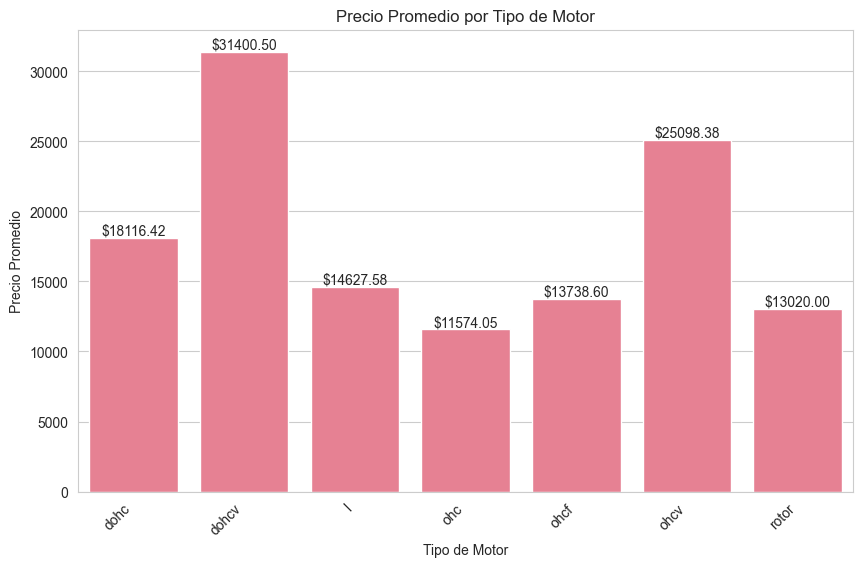

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el precio promedio por tipo de motor
precio_promedio_por_motor = df.groupby('enginetype')['price'].mean().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras
sns.barplot(x='enginetype', y='price', data=precio_promedio_por_motor)

# Añadir etiquetas y título
plt.xlabel('Tipo de Motor')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Tipo de Motor')

# Rotar las etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de precio a las barras
for index, row in precio_promedio_por_motor.iterrows():
    plt.annotate(f"${row['price']:.2f}", (index, row['price']), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Grafico de Barras Apiladas. Relacion entre Tipo de combustible y Consumo en ciudad


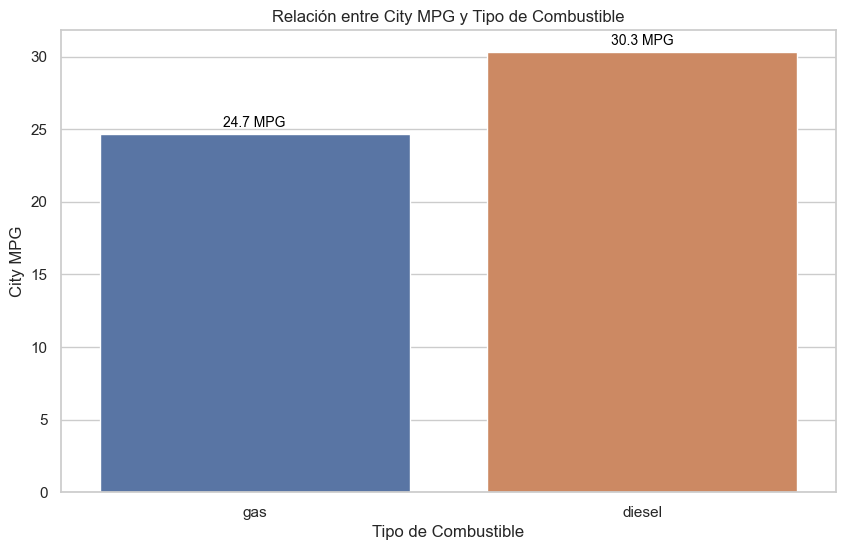

In [54]:
# Crear un gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='fueltype', y='citympg', data=df, errorbar=None, hue='fueltype')

# Añadir etiquetas y título
plt.xlabel('Tipo de Combustible')
plt.ylabel('City MPG')
plt.title('Relación entre City MPG y Tipo de Combustible')

# Agregar etiquetas de millas por galón (MPG) en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f} MPG', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()


Vehiculos considerados de Gama Alta usando la mediana de los precios como punto de corte

Vehículos de Gama Alta:


,CarName,price
74,buick regal sport coupe (turbo),45400.0
16,bmw x5,41315.0
73,buick century special,40960.0
128,porsche boxter,37028.0
17,bmw x3,36880.0
...,...,...
63,mazda glc deluxe,10795.0
174,toyota celica gt,10698.0
61,mazda glc custom,10595.0
42,honda civic (auto),10345.0


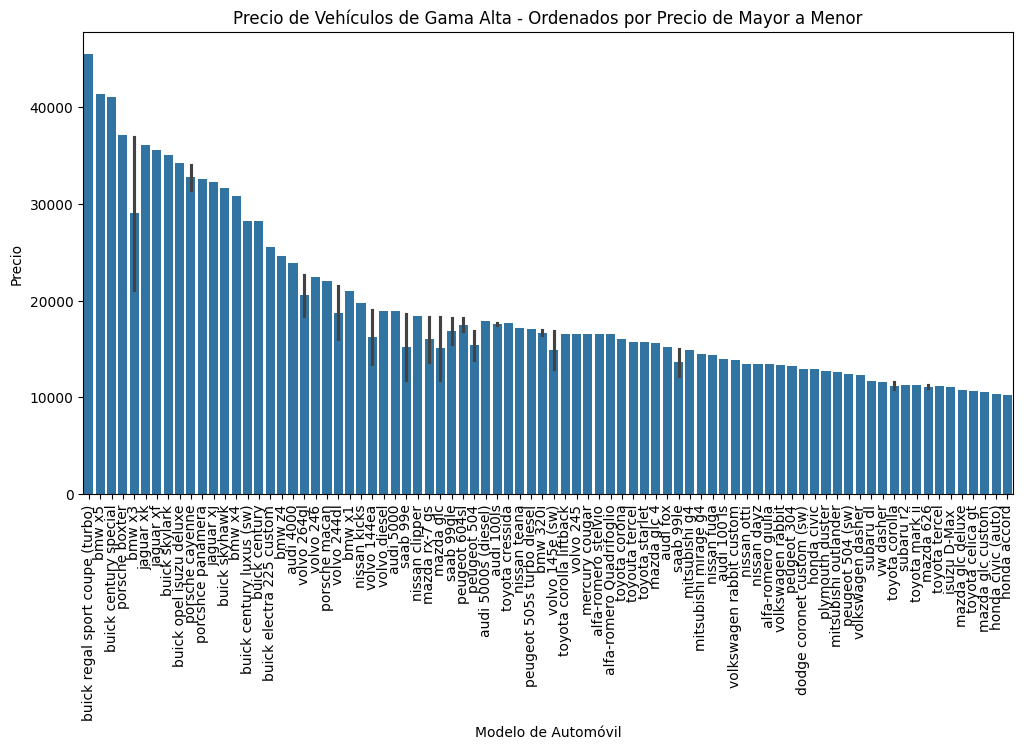

In [11]:
# Calcular la mediana de los precios
mediana_precio = df['price'].median()

# Crear una nueva columna "categoria" basada en la mediana de precios
df['categoria'] = df['price'].apply(lambda x: 'Gama Alta' if x >= mediana_precio else 'Gama Baja')

# Filtrar vehículos de Gama Alta
vehiculos_gama_alta = df[df['categoria'] == 'Gama Alta']

# Ordenar los vehículos de Gama Alta por precio de mayor a menor
vehiculos_gama_alta = vehiculos_gama_alta.sort_values(by='price', ascending=False)

# Mostrar la tabla de vehículos de Gama Alta
print("Vehículos de Gama Alta:")
display(vehiculos_gama_alta[['CarName', 'price']])

# Crear un gráfico de barras para Gama Alta
plt.figure(figsize=(12, 6))
sns.barplot(x='CarName', y='price', data=vehiculos_gama_alta)
plt.xlabel('Modelo de Automóvil')
plt.ylabel('Precio')
plt.title('Precio de Vehículos de Gama Alta - Ordenados por Precio de Mayor a Menor')
plt.xticks(rotation=90)
plt.show()



Vehiculos considerados de Gama Baja usando la mediana de los precios como punto de corte


Vehículos de Gama Baja:


,CarName,price
62,mazda rx-4,10245.0
147,subaru tribeca,10198.0
188,volkswagen dasher,9995.0
169,toyota starlet,9989.0
175,toyota corona,9988.0
...,...,...
76,mitsubishi mirage,5389.0
150,toyota corona mark ii,5348.0
50,maxda rx3,5195.0
18,chevrolet impala,5151.0


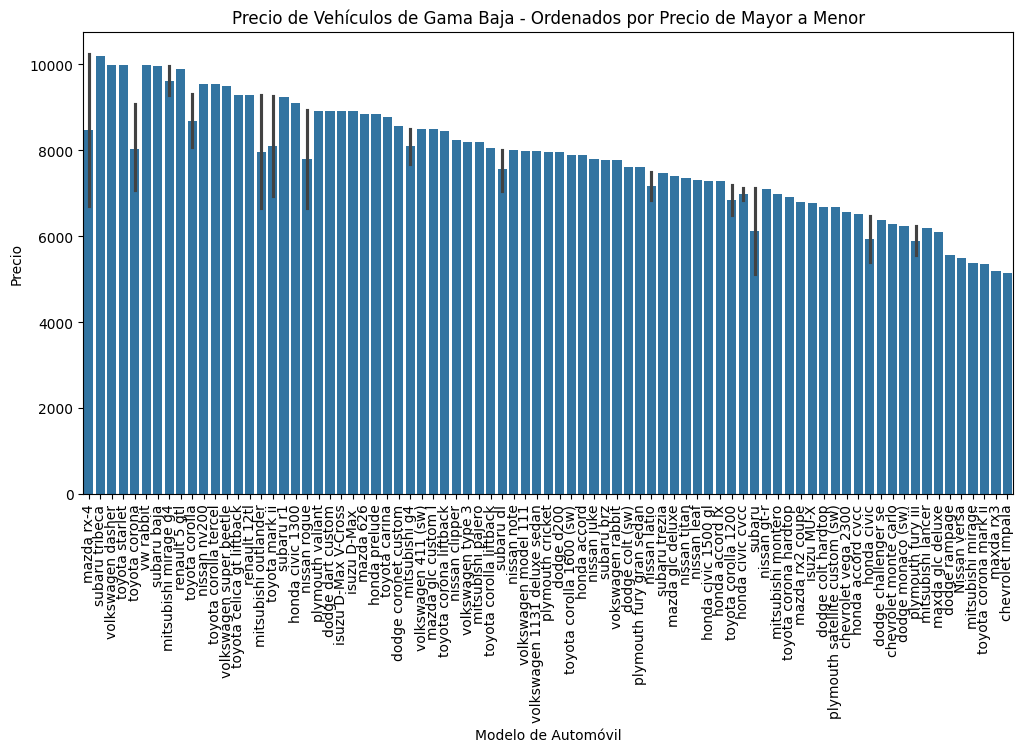

In [12]:
# Filtrar vehículos de Gama Baja
vehiculos_gama_baja = df[df['categoria'] == 'Gama Baja']

# Ordenar los vehículos de Gama Baja por precio de mayor a menor
vehiculos_gama_baja = vehiculos_gama_baja.sort_values(by='price', ascending=False)

# Mostrar la tabla de vehículos de Gama Baja
print("\nVehículos de Gama Baja:")
display(vehiculos_gama_baja[['CarName', 'price']])

# Crear un gráfico de barras para Gama Baja
plt.figure(figsize=(12, 6))
sns.barplot(x='CarName', y='price', data=vehiculos_gama_baja)
plt.xlabel('Modelo de Automóvil')
plt.ylabel('Precio')
plt.title('Precio de Vehículos de Gama Baja - Ordenados por Precio de Mayor a Menor')
plt.xticks(rotation=90)
plt.show()



In [15]:
# Filtrar los vehículos que se ajusten al rango de peso y longitud
vehiculos_norteamericanos = df[(df['curbweight'] >= peso_minimo) & (df['curbweight'] <= peso_maximo) &
                               (df['carlength'] >= longitud_minima) & (df['carlength'] <= longitud_maxima)]

# Seleccionar las columnas relevantes (CarName, carlength, enginesize y curbweight)
vehiculos_norteamericanos_info = vehiculos_norteamericanos[['CarName', 'carlength', 'enginesize', 'curbweight']]

# Ordenar los vehículos por peso de mayor a menor
vehiculos_norteamericanos_info = vehiculos_norteamericanos_info.sort_values(by='curbweight', ascending=False)

# Mostrar la tabla con la longitud, el tamaño del motor y el peso por vehículo
print(vehiculos_norteamericanos_info)



                             CarName  carlength  enginesize  curbweight
49                         jaguar xk      191.7         326        3950
68          buick century luxus (sw)      190.9         183        3750
74   buick regal sport coupe (turbo)      199.2         304        3715
72                     buick skylark      180.3         234        3685
67          buick electra 225 custom      190.9         183        3515
17                            bmw x3      197.0         209        3505
69                     buick century      187.5         183        3495
114        peugeot 505s turbo diesel      198.9         152        3485
110                      peugeot 504      198.9         152        3430
16                            bmw x5      193.8         209        3380
102                      nissan fuga      184.6         181        3296
113                      peugeot 504      198.9         120        3285
112                    peugeot 604sl      186.7         152     

Vehiculos para mercado Norteamericano en funcion a Motor, tamaño y peso

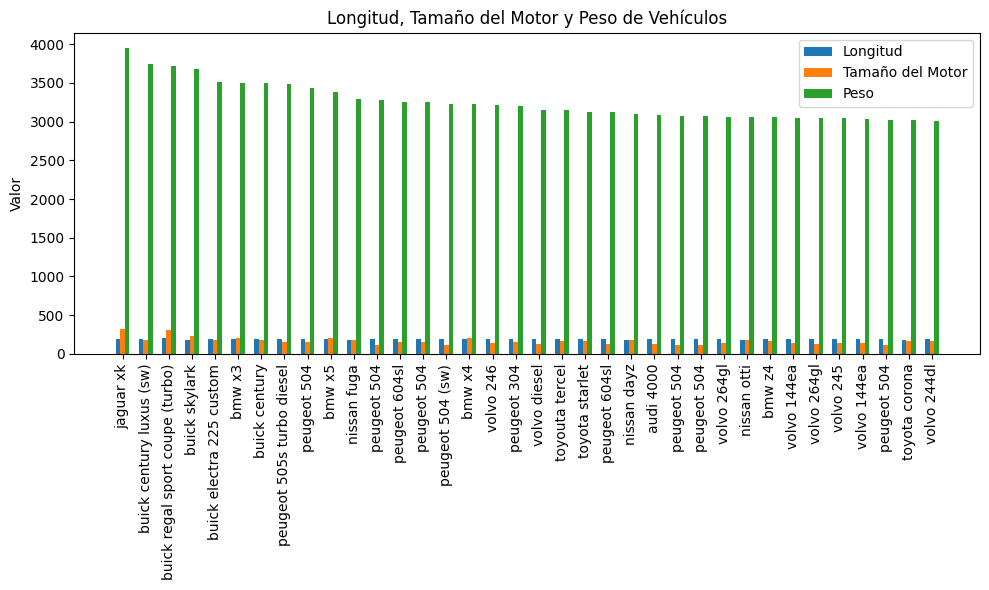

In [16]:
import matplotlib.pyplot as plt

# Filtrar los vehículos que se ajusten al rango de peso y longitud
vehiculos_norteamericanos = df[(df['curbweight'] >= peso_minimo) & (df['curbweight'] <= peso_maximo) &
                               (df['carlength'] >= longitud_minima) & (df['carlength'] <= longitud_maxima)]

# Seleccionar las columnas relevantes (CarName, carlength, enginesize y curbweight)
vehiculos_norteamericanos_info = vehiculos_norteamericanos[['CarName', 'carlength', 'enginesize', 'curbweight']]

# Ordenar los vehículos por peso de mayor a menor
vehiculos_norteamericanos_info = vehiculos_norteamericanos_info.sort_values(by='curbweight', ascending=False)

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los datos para cada categoría
nombres_vehiculos = vehiculos_norteamericanos_info['CarName']
longitud = vehiculos_norteamericanos_info['carlength']
tamanio_motor = vehiculos_norteamericanos_info['enginesize']
peso = vehiculos_norteamericanos_info['curbweight']

# Crear un rango para el eje x
x = range(len(nombres_vehiculos))

# Ancho de las barras
ancho_barras = 0.2

# Crear las barras para longitud, tamaño del motor y peso
plt.bar(x, longitud, width=ancho_barras, label='Longitud')
plt.bar([i + ancho_barras for i in x], tamanio_motor, width=ancho_barras, label='Tamaño del Motor')
plt.bar([i + 2 * ancho_barras for i in x], peso, width=ancho_barras, label='Peso')

# Etiquetas para el eje x
plt.xticks([i + ancho_barras for i in x], nombres_vehiculos, rotation=90)

# Etiqueta para el eje y
plt.ylabel('Valor')

# Título del gráfico
plt.title('Longitud, Tamaño del Motor y Peso de Vehículos')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


OBJETIVO 1: CLASIFICACION DE PRECIOS ( BARATOS Y CAROS)

In [40]:
# convertir las en variables categoticas en numéricas

df2 = pd.get_dummies(df, columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","fuelsystem" ])  # Agrega todas las variables categóricas

# Verifica los resultados
print(df2.head())  # Muestra las primeras filas del DataFrame con las nuevas columnas numéricas

   car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight cylindernumber  enginesize  ...  \
0      64.1       48.8        2548           four         130  ...   
1      64.1       48.8        2548           four         130  ...   
2      65.5       52.4        2823            six         152  ...   
3      66.2       54.3        2337           four         109  ...   
4      66.4       54.3        2824           five         136  ...   

   enginetype_ohcv  enginetype_rotor  fuelsystem_1bbl  fuelsystem_2bbl  \
0            False             False            False            False  

In [45]:
import pandas as pd

# Configura pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Tu DataFrame
print(df2)



     car_ID  symboling                   CarName  wheelbase  carlength  \
0         1          3        alfa-romero giulia       88.6      168.8   
1         2          3       alfa-romero stelvio       88.6      168.8   
2         3          1  alfa-romero Quadrifoglio       94.5      171.2   
3         4          2               audi 100 ls       99.8      176.6   
4         5          2                audi 100ls       99.4      176.6   
..      ...        ...                       ...        ...        ...   
200     201         -1           volvo 145e (sw)      109.1      188.8   
201     202         -1               volvo 144ea      109.1      188.8   
202     203         -1               volvo 244dl      109.1      188.8   
203     204         -1                 volvo 246      109.1      188.8   
204     205         -1               volvo 264gl      109.1      188.8   

     carwidth  carheight  curbweight cylindernumber  enginesize  boreratio  \
0        64.1       48.8        2